$%operadores de latex simplificados
\newcommand{\parder}[2]{\frac{\partial #1}{\partial #2}}            % Derivada Parcial
\newcommand{\pardder}[2]{\frac{\partial^2 #1}{\partial #2^2}}       % Derivada Parcial Segunda
\newcommand{\parddercross}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}  % Derivada Parcial Segunda cruzada
\newcommand{\pardern}[3]{\frac{\partial^{#3} #1}{\partial #2^{#3}}} % Derivada Parcial de orden #3
\newcommand{\totder}[2]{\frac{\text{d} #1}{\text{d} #2}}            % Derivada total
\newcommand{\totdder}[2]{\frac{\text{d}^2 #1}{\text{d} #2^2}}       % Derivada total Segunda
\newcommand{\totdern}[3]{\frac{\text{d}^{#3} #1}{\text{d} #2^{#3}}} % Derivada total de orden #3
\newcommand{\sustder}[2]{\frac{\text{D} #1}{\text{D} #2}}              % Derivada sustancial
\newcommand{ \heat}{\dot{\mathcal{Q}}}
\newcommand{\half}{\frac{1}{2}}  
\newcommand{\xcoor}{x}                  % Coordenada x
\newcommand{\ycoor}{y}                  % Coordenada y
\newcommand{\varg}{\phi}               % Variable genérica (escalar)
\newcommand{\ii}{\textbf{i}}
$


# Finite Difference Method

The Finite Difference Method (FDM) is based on discretizing the spatial dominion in a finite amount of (equally spaced, if possible) nodes. In every node the partial derivatives of the unknown function are evaluated using finite difference formulas, which yield a discretized version of the governing equation when they are substituted in it. 
When the discretization is regular (i.e. the nodes are equally spaced) then any node may be found using a set of integer indexes. For example, when dealing with a one dimensional problem 

![title](dif_finitas.png)

we have $\Delta x=constant$, so 
$$\begin{align}
x_0 &=0 \\
x_1 &=x_0+\Delta x\\
x_2 &=x_1+\Delta x=x_0+2\Delta x\\
\dots \\
x_i & =x_0+i\Delta x
\end{align}$$

When dealing with a 2 dimensional problem we need two indices to describe any given (x,y) coordinate. 

![title](dif_fin_2D.png)
However, when the domain is stored in the computer and is embedded in a coefficient matrix the indices collapse into a single one, as we will see later. 


In both cases we change a continous differential equation which solution is $$\phi(x, y)$$ to a set of discrete algebraic equations whose unknowns are the values of $\phi(x_i, y_j)$ in the prescribed nodes
**The solution of the equation $\phi$ is only known at the discrete points $(x_i, y_j)$.**
## Discretization of the equations

In order to solve any ODE or PDE we replace all the derivatives in it with finite difference formulas, i.e. approximate discretized versions of the analytical derivatives
  To accomplish that we make a  **Taylor series** around $\xcoor_i$ for any given $\xcoor$

$$
\begin{equation} 
  \begin{aligned}
    \varg(\xcoor) &= \varg(\xcoor_i) + (\xcoor - \xcoor_i) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\xcoor - \xcoor_i)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\xcoor - \xcoor_i)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} \\
    & \qquad + \cdots + \frac{(\xcoor - \xcoor_i)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
  \end{aligned}
\end{equation}
$$

replacing $x=x_{i+1}$ in the previous expresion we get


$$
\begin{equation} 
     \varg(\color{red}{x_{i+1}}) = \varg(\xcoor_i) + (\color{red}{x_{i+1}} - \xcoor_i) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\color{red}{x_{i+1}} - \xcoor_i)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\color{red}{x_{i+1}} - \xcoor_i)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\color{red}{x_{i+1}} - \xcoor_i)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

solving for the first derivative  $\left.\parder{\varg}{\xcoor}\right|_{\xcoor_i}$ as a function of $\varg(\color{red}{x_{i+1}}) $  and $ \varg(\xcoor_i)$

$$
\begin{equation} 
   \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} = \frac{\varg(\color{red}{x_{i+1}}) - \varg(\xcoor_i)}{ (\color{red}{x_{i+1}} - \xcoor_i)}   - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^2}{2! (\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^3}{3!(\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} - \cdots - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^n}{n! (\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

The only terms that can be evaluated in the left hand side are  $\varg({x_{i+1}}) $  and $ \varg(\xcoor_i)$. Since the rest of the series may not be evaluated, it is *truncated* until the first term, resulting
$$
\begin{equation} 
   \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} \approx \frac{\varg({x_{i+1}}) - \varg(\xcoor_i)}{ ({x_{i+1}} - \xcoor_i)} 
\end{equation}
$$
yielding an apprximate result of the first derivative. This approximation will be sufficient as long as  ${x_{i+1}}$ and $\xcoor_i$  are *close enough*. Since ${x_{i+1}}$ is after  ${x_{i}}$ this expression is known as a *forward difference*.

However, it is not very useful to derive an approximation when its error cannot be quantified. Since the exact Taylor series with infinite terms is identical to the function, then the difference between the infinite Taylor series and the approximate one is the exact error. All the terms left outside the approximate expression are the exact error. For this reason this error is known as  **Truncation Error**

$$
\begin{equation} 
   \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} -\frac{\varg({x_{i+1}}) - \varg(\xcoor_i)}{ ({x_{i+1}} - \xcoor_i)} =\quad E_T \quad =  - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^2}{2! (\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^3}{3!(\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} - \cdots - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^n}{n! (\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

because we divided by $({x_{i+1}} - \xcoor_i)$ the term associated to $\pardder{\varg}{\xcoor}$ ends up being linear with $({x_{i+1}} - \xcoor_i)$. **If all the derivatives of order 2 or more are bounded, it could be expected that the dominant term in the series is the first one**, given that if ${x_{i+1}}$ y $\xcoor_i$ are nearby theri difference should be less than 1, and any $x< 1$ in $x^n$ decreases more rapidly the greater the value of $n$   

Then the true truncation error may be approximated by
$$E_T \approx  - \frac{({x_{i+1}} - \xcoor_i)}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} $$

Es decir, el error de truncamiento es lineal con $({x_{i+1}} - \xcoor_i)$. If the distance between any given node and its neighbours is the same, it is usually called *discretization or calculation step * $({x_{i+1}} - \xcoor_i)=\Delta x$ 
 Since we do not know the exact value of the second derivative but we are only interested in estimating the order of magnitude of the error, we may simply state that $E_T $ is of  Order $\Delta x$
 
$$E_T \quad \mathcal {O} (\Delta x)$$


In [1]:
""" Evaluamos el error de truncamiento para la serie de Taylor de la  función e^(x) en x0=0
para x=0.5
e^x = e^x0+ e^x0*(x-x0)+e^x0*(x-x0)^2/2+ e^x0*(x-x0)^3/6.... 
"""

from math import factorial, exp
x0=0 # pto de inicio para la serie de taylor
x = 1.5;  #pto donde quiero evaluar la función
nt = 4; #número de términos de la serie
exp_x = exp(x0); #valor inicial de la serie de taylor (termino cero)


print (' terminos      exp(x)         e trunc(%)          et(%)')
print ('%7g %13.5f %13.5f %13.5f' % (0, exp_x, exp(x0) * (x-x0)/exp_x*100,abs(exp_x-exp(x))/exp(x)*100 ))
for i in range (1,nt+1): #iteración desde el primer término hasta el nt esimo
   exp_x_ant = exp_x
   exp_x = exp_x+exp(x0) * (x-x0)**i/factorial(i) #le sumo el término i esimo a la serie de taylor
   etrunc = (exp(x0) * (x-x0)**(i+1)/factorial(i+1))/exp_x*100  #error de trunc dado por el término i+1
   et = abs(exp_x-exp(x))/exp(x)*100 #error verdadero
   print ('%7g %13.5f %13.5f %13.5f' % (i, exp_x, etrunc, et))

print ( 'exp(',x,') taylor= %12.6g' % exp_x  ) 
print ( 'exp(',x,') exacta= %12.6g' % exp(x)  ) 

 terminos      exp(x)         e trunc(%)          et(%)
      0       1.00000     150.00000      77.68698
      1       2.50000      45.00000      44.21746
      2       3.62500      15.51724      19.11532
      3       4.18750       5.03731       6.56425
      4       4.39844       1.43872       1.85759
exp( 1.5 ) taylor=      4.39844
exp( 1.5 ) exacta=      4.48169


### Second order discretization

When we replace in the Taylor Series  $\varg(\color{blue}{x_{i-1}}) = \varg(\xcoor)$

$$
\begin{equation} 
     \varg(\color{blue}{x_{i-1}}) = \varg(\xcoor_i) + (\color{blue}{x_{i-1}} - \xcoor_i) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\color{blue}{x_{i-1}} - \xcoor_i)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\color{blue}{x_{i-1}} - \xcoor_i)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\color{blue}{x_{i-1}} - \xcoor_i)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

Since $x_{i-1}<x_i$ it is convenient to express it in terms of $x_i -x_{i-1}$. **All the terms with an even  $n$ exponent will remain positive  and those with an odd $n$ exponent become negative**.

$$
\begin{equation} 
     \varg(\color{blue}{x_{i-1}}) = \varg(\xcoor_i) - (  \xcoor_i-\color{blue}{x_{i-1}}) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{( \xcoor_i-\color{blue}{x_{i-1}})^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{( \xcoor_i-\color{blue}{x_{i-1}})^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{( \xcoor_i-\color{blue}{x_{i-1}})^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

Then another expression for the first derivative may be obtained  $\left.\parder{\varg}{\xcoor}\right|_{\xcoor_i}$
$$
\begin{equation} 
   \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} \approx \frac{\varg({x_{i}}) - \varg(\xcoor_{i-1})}{ ({x_{i}} - \xcoor_{i-1})} 
\end{equation}
$$
Its truncation error is of order $\mathcal{O}(\Delta x) $ as well . Since ${x_{i-1}}$ is used, which is beforebefore ${x_{i}}$ this expression is known as  *backward difference*.


$$
\begin{equation} 
 E_T \quad =  + \frac{(\xcoor_i-\color{blue}{x_{i-1}})}{2! } \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{(\xcoor_i-\color{blue}{x_{i-1}})^2}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{\xcoor_i-\color{blue}{x_{i-1}}^n}{n! } \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

 
Both the Forward difference and the Backward difference have errors of order $\mathcal{O}(\Delta x) $, however if we construct a forwadr and a backward difference with the same $\Delta x$ (both neighbouring nodes are at the same distance from $x_i$ , i.e. $\xcoor_i-\color{blue}{x_{i-1}}=\Delta x =\color{red}{x_{i+1}}-\xcoor_i$) we may substract the backward formula to the forward, obtaining:
$$\begin{aligned}
   &  \varg(\color{red}{x_{i+1}}) = \varg(\xcoor_i) + (\Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H\\
-&\\
    & \varg(\color{blue}{x_{i-1}}) = \varg(\xcoor_i) - ( \Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{( \Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{( \Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H
\end{aligned}
$$
 
The terms with even $n$ cancel out, and we get
$$
\begin{equation} 
   \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} \approx \frac{\varg({x_{i+1}}) - \varg(\xcoor_{i-1})}{ (2\Delta x)} +\frac{( \Delta x)^2}{2\cdot 3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots
\end{equation}
$$

The term with the second derivative is eliminated and we get a scheme whose error is proportional to the *third derivative* and to $\Delta x^2$  (i.e. it is of Order $\mathcal{O}(\Delta x^ 2) $).  Since all values of $\varg$  in this expression are evaluated in points symetrical w.r.t. $\xcoor_i$, this formula and the other ones related to it are called *centered differences*

It can be shown that in general centered differences have a truncation error of order greater in one to their analogous forward or backward schemes. 
In the next figure we show a graphical interpretation of the centered scheme
![title](dif_cent.png)

The secant line that passes between $\xcoor_{i+1}$ and $\xcoor_{i-1}$ has "more information" of the behavior of the function than those that pass through $\xcoor_{i}$

In [2]:
""" evaluacion de las derivadas exactas y numéricas para una función"""

import sympy as sym
import math
x =sym.Symbol('x')

dfdx=sym.diff(sym.exp(x),x) #función simbolica
dfdx_an=sym.utilities.lambdify(( x), dfdx) #función (numérica) de x creada a partir de la func simbólica

x0=2; 
Deltax=0.1;

dfdx_FD=(math.exp(x0+Deltax)-math.exp(x0))/Deltax
dfdx_BD=(math.exp(x0)-math.exp(x0-Deltax))/Deltax
dfdx_CD=(math.exp(x0+Deltax)-math.exp(x0-Deltax))/2/Deltax
dfdx_ex=dfdx_an(x0) #funcion derivada valuada en xo


print( "exacta   |  hacia adelante | hacia atrás |centrada")
print ('%8.5f %8.5f %8.5f  %8.5f' % (dfdx_ex,  dfdx_FD, dfdx_BD , dfdx_CD ))

#cálulo de errores

#error para la diferencia forward
e_fd=(dfdx_FD-dfdx_ex)/dfdx_ex*100
e_bd=(dfdx_BD-dfdx_ex)/dfdx_ex*100
e_cd=(dfdx_CD-dfdx_ex)/dfdx_ex*100

print ('%s %8.5f  %8.5f  %8.5f' % ('errores rel verdaderos',  e_fd, e_bd ,e_cd ))


exacta   |  hacia adelante | hacia atrás |centrada
 7.38906  7.77114  7.03162   7.40138
errores rel verdaderos  5.17092  -4.83742   0.16675


### Derivatives of order 2 or greater

To obtain a scheme for the second derivative it is necessary to eliminate the term with the first derivative in the Taylor series. To do that we make another Taylor series reaching  $x=x_0+2\Delta x=x_{i+2}$, and then we substract to it the Taylor series reaching $x_{i+1}$ multiplied by 2. 

$$\begin{aligned}
&\varg({x_{i+2}}) = \varg(\xcoor_i) + (2\Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(2\Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(2\Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(2\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H\\
- & \\
 &2\varg({x_{i+1}}) = 2\varg(\xcoor_i) + 2(\Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + 2\frac{(\Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + 2\frac{(\Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + 2\frac{(\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H
 \end{aligned}
$$

Solving for $\pardder{\varg}{\xcoor}$ we get

$$ \varg({x_{i+2}})-2\varg({x_{i+1}}) +\varg({x_{i}})=2\frac{(\Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + 6\frac{(\Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots$$

Then
$$
\left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i}=\frac{\varg({x_{i+2}})-2\varg({x_{i+1}}) +\varg({x_{i}})}{\Delta x^2}-(\Delta x) \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots
$$

We have obtained a *first order forward scheme* ($\mathcal{O}(\Delta x)$) for the second derivative. Even though the truncation error is proportional to  $\left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i}$, it is also linear in $\Delta x$.


#### Backward difference

If we repeat the process but with Taylor series reaching $x=x_i-\Delta x=x_{i-1}$  and $x=x_i-2\Delta x=x_{i-2}$ we get
$$
\left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i}=\frac{\varg({x_{i-2}})-2\varg({x_{i-1}}) +\varg({x_{i}})}{\Delta x^2}+(\Delta x) \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots
$$

#### Centered difference

Like in the case of the first derivative, we can derive a scheme that uses values symmetrical to $\xcoor_i$ to reduce the truncation error. 

Using Taylor series reaching $x=x_i-\Delta x=x_{i-1}$  and  $x=x_i+1\Delta x=x_{i+1}$, and adding them up we get

$$\begin{aligned}
   &  \varg(\color{red}{x_{i+1}}) = \varg(\xcoor_i) + (\Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H\\
+&\\
    & \varg(\color{blue}{x_{i-1}}) = \varg(\xcoor_i) - ( \Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{( \Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{( \Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H
\end{aligned}
$$
in this case all terms with odd $n$ cancel out, getting
$$
\left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i}=\frac{\varg({x_{i+1}})-2\varg({x_{i}}) +\varg({x_{i-1}})}{\Delta x^2} + \frac{(\Delta x)^2}{4!} \left.\pardern{\varg}{\xcoor}{4}\right|_{\xcoor_i}
$$
a scheme of order $\mathcal{O} (\Delta x) ^2$

#### Geometrical interpretation of the centered difference scheme

taking into account that $\pardder{\varg}{x}=\parder{}{x}\left(\parder{\varg}{x}\right)$ we may state that the recursive application of the centered first derivative scheme in points symmetrical to $\xcoor_i$ should yield a second order centered scheme. 

$$\pardder{\varg}{x}\approx \frac{\parder{\varg}{x}_{x_k} +\parder{\varg}{x}_{x_k-1}}{\Delta x}$$

If we evaluate the first order derivatives in points that lie between $\xcoor_i$ and $\xcoor_{i+1}$ and between $\xcoor_i$ and $\xcoor_{i-1}$ respectively :
![title](deriv_centrada_o2.png)


We get the value of the  first derivative at $x_{i-1/2}$ using  $\varg_{i-1}$ y $\varg_{i}$  

$$  \left.\parder{\varg}{\xcoor}\right|_{\xcoor_{i-1/2}}=\frac{\varg_{i}-\varg_{i-1}}{2\frac{\Delta x}{2}} + \mathcal{O}(\Delta x^2)$$
and the first derivative at $x_{i+1/2}$ using  $\varg_{i+1}$ y $\varg_{i}$ 

$$  \left.\parder{\varg}{\xcoor}\right|_{\xcoor_{i+1/2}}=\frac{\varg_{i+1}-\varg_{i}}{2\frac{\Delta x}{2}} + \mathcal{O}(\Delta x^2)$$
  Plotting $ \totder{\varg}{x}$ vs$ x$ to visualize the second derivative we get
$$ \begin{aligned}  
\left.\pardder{\varg}{\xcoor}\right|_{\xcoor_{i}}&=\frac{\parder{\varg}{x}_{i+1/2}-\parder{\varg}{x}_{i-1/2}}{2\frac{\Delta x}{2}} + \mathcal{O}(\Delta x^2)\\
  \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_{i}}&=\frac{\frac{\varg_{i+1}-\varg_{i}}{2\frac{\Delta x}{2}} + \mathcal{O}(\Delta x^2)-\frac{\varg_{i}-\varg_{i-1}}{2\frac{\Delta x}{2}} - \mathcal{O}(\Delta x^2)}{2\frac{\Delta x}{2}} + \mathcal{O}(\Delta x^2)\\
      \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_{i}}&=\frac{\varg_{i+1} -2\varg_{i}+\varg_{i-1} }{{\Delta x}^2} + \mathcal{O}(\Delta x^2)
\end{aligned}
$$

Which is the same formula obtained previously

#### Finite difference operators
It is customary in the literature to introduce the following notation for the forward and backward finite difference operators:

$$\nabla_x (\varg_i)= \varg_i-\varg_{i-1} \qquad \Delta_x (\varg_i)= \varg_{i+1}-\varg_{i}  $$ 
Using these operators recursively new finite difference formulas may be obtained 

For example
$$
\begin{aligned}
  \frac{\Delta_x^2 (\varg_i)}{(\Delta x)^2} &= \frac{\Delta_x(\varg_{i+1} - \varg_i)}{(\Delta x)^2} = \frac{\Delta_x (\varg_{i+1}) - \Delta_x (\varg_i)}{(\Delta x)^2}  = \frac{(\varg_{i+2} - \varg_{i+1}) - (\varg_{i+1}  - \varg_i)}{(\Delta x)^2} \\
              &= \frac{\varg_{i+2} - 2\varg_{i+1} + \varg_i}{(\Delta x)^2} = \pardder{\varg_i}{\xcoor} + O(\Delta x),
 \end{aligned}
$$

Or for the third derivative
$$
\begin{aligned}
  \frac{\Delta_x^3 (\varg_i)}{(\Delta x)^2} &= \frac{\Delta_x\left[\Delta_x^2(\varg_i)\right]}{(\Delta x)^2} = 
  \frac{\Delta_x(\varg_{i+2}) - 2\Delta_x(\varg_{i+1}) + \Delta_x(\varg_i)}{(\Delta x)^2} \\
   &= \frac{\varg_{i+3} - 3\varg_{i+2} + 3 \varg_{i+1} - \varg_i}{(\Delta x)^2} = \pardern{\varg_i}{\xcoor}{3} + O(\Delta x).
  \end{aligned}
 $$

##### Centered differences

Habíamos visto que las fórmulas de diferencias centradas se obtenían cuando había simetría en las expansiones en serie de taylor usadas. 
Entonces, si combinamos un operador hacia adelante y otro hacia atrás deberíamos obtener el mismo resultado
$$
\begin{aligned}
  \pardder{\varg_i}{\xcoor} + O(\Delta x)^2&=  \frac{\Delta_x(\varg_{i}) - \nabla(\varg_{i})}{(\Delta x)^2} \\
  &= \frac{(\varg_{i+1} - \varg_{i}) - (\varg_{i}  - \varg_{i-1})}{(\Delta x)^2} \\
              &= \frac{\varg_{i+1} - 2\varg_{i} + \varg_{i-1}}{(\Delta x)^2}
 \end{aligned}
$$

There is also a set of Recursive formulas for finite difference schemes of arbitrary order from the book by Hoffmann and Chiang (2002) 
$$\begin{aligned}
&\pardern{\varg_i}{\xcoor}{n} = \frac{\Delta_x^n (\varg_{i-\frac{n}{2}}) + \nabla_x^n (\varg_{i+\frac{n}{2}})}{2(\Delta x)^n} + O(\Delta x)^2, \qquad &\text{para } n \text{ par,} \\
  &\pardern{\varg_i}{\xcoor}{n} = \frac{\Delta_x^n (\varg_{i-\frac{n-1}{2}}) + \nabla_x^n (\varg_{i+\frac{n-1}{2}})}{2(\Delta x)^n} + O(\Delta x)^2, \qquad &\text{para } n \text{ impar.}
  \end{aligned}
  $$

In the following cell we show how to derive the difference formulas using SymPy, which can be used as building blocks to obtain new formulas

In [4]:
"""fórmulas de diferencias finitas evaluadas simbolicamente"""

i, x=sym.symbols('i, x')
Deltax=sym.Symbol("\Delta x")
phi=sym.Function('phi')

def Nabla(s):  #def del operador dif hacia atras
    return( phi(s)- phi(s-1))
def Delta(s): #def del operador dif hacia adelante
    return (phi(s+1)- phi(s))


# Derivada primera
dphidx_b=Nabla(i+1)/Deltax
dphidx_f=Delta(i+1)/Deltax
print('dphi/dx forward en i+1', dphidx_f)
print('dphi/dx backward en i+1', dphidx_b)
#Derivada segunda
d2phidx2_f=(Delta(i+1)-Delta(i))/Deltax**2 #hacia adelante
d2phidx2_b=(Nabla(i)-Nabla(i-1))/Deltax**2 #hacia atrás
d2phidx2_c=(Delta(i)-Nabla(i))/Deltax**2 # centrada
print('d2phi/dx2 forward', d2phidx2_f)
print('d2phi/dx2 backward', d2phidx2_b)
print('d2phi/dx2 centrada', d2phidx2_c)

##funciones para diferencias de segundo orden
def Nabla2(s): #funcion que define el operador dif segunda hacia atras
    return( Nabla(s)- Nabla(s-1))

def Delta2(s):
    return( Delta(s+1)- Delta(s))

print('Hoffmann chiang n=2',(Nabla2(i+1)+Delta2(i-1))/2/Deltax**2)  #fórmula de hoffmann chiang

##funciones para diferencias de orden n (usando recursion)
def Nabla_n(s, n): #operador dif hacia atras recursivo
    if n==1:
        return( phi(s)- phi(s-1)) #operador para orden 1
    else:
        return( Nabla_n(s, n-1)- Nabla_n(s-1, n-1))

def Delta_n(s, n):
    if n==1:
        return( phi(s+1)- phi(s)) #operador para orden 1
    else:
        return( Delta_n(s+1, n-1)- Delta_n(s, n-1))




print('Hoffmann chiang con recursion',(Nabla_n(i+2, 4) +Delta_n(i-2,4))/2/Deltax**4)

dphi/dx forward en i+1 (-phi(i + 1) + phi(i + 2))/\Delta x
dphi/dx backward en i+1 (-phi(i) + phi(i + 1))/\Delta x
d2phi/dx2 forward (phi(i) - 2*phi(i + 1) + phi(i + 2))/\Delta x**2
d2phi/dx2 backward (phi(i) + phi(i - 2) - 2*phi(i - 1))/\Delta x**2
d2phi/dx2 centrada (-2*phi(i) + phi(i - 1) + phi(i + 1))/\Delta x**2
Hoffmann chiang n=2 (-2*phi(i) + phi(i - 1) + phi(i + 1))/\Delta x**2
Hoffmann chiang con recursion (6*phi(i) + phi(i - 2) - 4*phi(i - 1) - 4*phi(i + 1) + phi(i + 2))/\Delta x**4


###  Finite differences in bidimensional domains

To extend the finite difference schemes to two dimensions we use a Taylor series for functions of two (or more) variables

$$ \begin{aligned}
    \varg(\xcoor+\Delta x,\ycoor+\Delta y) &= \varg(\xcoor,\ycoor) + \Delta x \parder{\varg}{\xcoor} + \Delta y \parder{\varg}{\ycoor} + \frac{(\Delta x)^2}{2!} \pardder{\varg}{\xcoor} \\
    & \qquad + \frac{(\Delta y)^2}{2!} \pardder{\varg}{\ycoor} + 2\frac{\Delta x \Delta y}{2!} \parddercross{\varg}{\xcoor}{\ycoor} + O\left[(\Delta x)^3,(\Delta y)^3\right].
  \end{aligned}
$$

When evaluating the partial derivative with respect to an independent variable the other one remains constant. Then the Taylor series may be reduced to one of one variable 


To evaluate the crossed second (or higher) order derivatives $\parddercross{\varg}{\xcoor}{\ycoor}$ we may: 
1. Replacing in the Taylor series one dimensional finite difference formulas for the derivatives $\parder{\varg}{\xcoor}$ and $\parder{\varg}{\ycoor}$ and then solve for $\parddercross{\varg}{\xcoor}{\ycoor}$
2. apply the finite difference operators to the definition of $\parddercross{\varg}{\xcoor}{\ycoor}$

In both cases we get the same result, sometimes one form may be more tedious than the other

$$\begin{aligned}
  \parddercross{\varg}{\xcoor}{\ycoor} &= \parder{}{\xcoor} \left(\parder{\varg}{\ycoor}\right)\\
  &= \parder{}{\xcoor}\left(\frac{\varg_{i,{j+1}} - \varg_{i,{j-1}}}{2\Delta y} \right) + O(\Delta y)^2 = \frac{1}{2\Delta y}\left(\parder{\varg_{i,{j+1}}}{\xcoor} - \parder{\varg_{i,{j-1}}}{\xcoor}\right) + O(\Delta y)^2\\
  &=\frac{1}{2\Delta y}\left[\frac{\varg_{{i+1},{j+1}} - \varg_{{i-1},{j+1}}}{2\Delta x} - \frac{\varg_{{i+1},{j-1}} - \varg_{{i-1},{j-1}}}{2\Delta y}\right] + O\left[(\Delta x)^2,(\Delta y)^2\right]
  \end{aligned}
$$

Even though the schemes are identical to their one dimensional counterparts, in certain equations there are terms superimposed at certain points $\varg_{i,j}=\varg(\xcoor_i, \ycoor_j)$

For example, for the laplacian $\nabla^2 (\varg)$:

$$\begin{aligned}
\nabla^2 (\varg)&= \pardder{\varg}{x}+\pardder{\varg}{y}\\
&=\frac{\varg_{i+1, j} -2\varg_{i, j}+\varg_{i-1, j} }{{\Delta x}^2} + \mathcal{O}(\Delta x^2)+\frac{\varg_{i, j+1} -2\varg_{i, j}+\varg_{i,j-1} }{{\Delta y}^2} + \mathcal{O}(\Delta y^2)\\
\end{aligned}
$$

If we use the same discretization step for x and y( $\Delta x=\Delta y=h$) this expression reduces to
$$\frac{\varg_{i, j+1}+\varg_{i+1, j} -4\varg_{i, j}+\varg_{i-1, j}+\varg_{i,j-1} }{{h}^2} + \mathcal{O}(h^2)$$


Some authors call the geometrical patch in the domain used to calculate the operators  **computational molecules** or **stencils**
![title](stencil_finiteDifference.png)

#### Example: Laplace's equation in a rectangular dominion


This equation may represent the distribution on a rectangular plate due to sources inside it or due to the values of $T$ at the edges. 
$$ \begin{aligned}
\alpha\nabla^2 T&=0\\
\alpha(\pardder{T}{x}+\pardder{T}{y}) &=0\\
\end{aligned}
$$

We define the heat flux as a vector in the opposite direction of the temperature gradient $\vec{q}=-\kappa \nabla T$, and its cartesian components are $\vec{q}=-\kappa \parder{ T}{x}\hat i+ -\kappa \parder{ T}{y}\hat j$. $\kappa$ is the heat conductivity.  
It can be shown that the conservation of energy in absence of sources can be expressed as $\nabla\cdot \vec{q}=0$

For this reason the temperature at any given node will be affected by its neighbours in the y direction and in the z direction. The system of algebraic equiations will depend on two indices. To simplify the assembly of the coefficient matrix we need to express any node with one single index, so that the unknown temperatures are in a column vector.


![title](estr_datos_FDM2D.png)

 To do this we  read all the nodes along x  for $y=j\Delta y$ and when we reach $x=L$ we move to
$y=(j+1)\Delta y$. Then, if there are $N_{NX}=\frac{L_x}{\Delta _x}$ nodes in x for every given $y$, then 

$$\phi_{i, j}= \phi(K)= \phi(i+N_{NX}(j))$$
if the computing system starts counting from zero (e.g. Python, C) o r
$$\phi_{i, j}= \phi(K)= \phi(i+N_{NX}(j-1))$$
 if it counts starting from one (e.g. Matlab)
 
the equation for  $\phi(i,j)$ 
$$ =\frac{\varg_{i+1, j} -2\varg_{i, j}+\varg_{i-1, j} }{{\Delta x}^2} + \mathcal{O}(\Delta x^2)+\frac{\varg_{i, j+1} -2\varg_{i, j}+\varg_{i,j-1} }{{\Delta y}^2} + \mathcal{O}(\Delta y^2)
$$
becomes

$$ =\frac{\varg_{k+1} -2\varg_{k}+\varg_{k-1} }{{\Delta x}^2} + \mathcal{O}(\Delta x^2)+\frac{\varg_{k+m} -2\varg_{k}+\varg_{k-m} }{{\Delta y}^2} + \mathcal{O}(\Delta y^2)
$$

/tmp/ipykernel_21066/3727799211.py:56: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.0182689  0.03496437 0.0487081  0.0584437  0.06347965
  0.06347965 0.0584437  0.0487081  0.03496437 0.0182689  0.        ]
 [0.         0.03811122 0.07288048 0.10142434 0.12158703 0.13199527
  0.13199527 0.12158703 0.10142434 0.07288048 0.03811122 0.        ]
 [0.         0.06129551 0.11702201 0.16252173 0.19448482 0.21091911
  0.21091911 0.19448482 0.16252173 0.11702201 0.06129551 0.        ]
 [0.         0.09004882 0.1713903  0.23715576 0.2829114  0.30627726
  0.30627726 0.2829114  0.23715576 0.1713903  0.09004882 0.        ]
 [0.         0.12750949 0.24133461 0.33179959 0.39372777 0.42500126
  0.42500126 0.39372777 0.33179959 0.24133461 0.12750949 0.        ]
 [0.         0.17865451 0.33463905 0.45498024 0.53519884 0.57499874
  0.57499874 0.53519884 0.45498024 0.33463905 0.17865451 0.        ]
 [0.         0.2524695  0.46358684 0.61828349 0.7

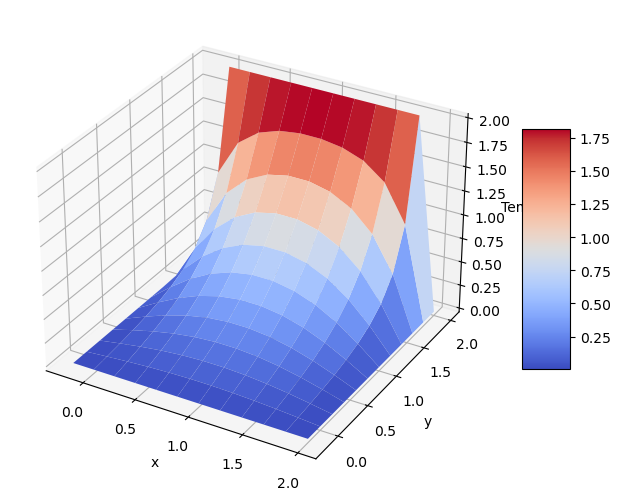

In [1]:
"""ecuación de laplace en dominio rectangular"""
import numpy as np

Lx=2;   Ly=2;
nx=10; ny=10; # numero de nodos en c u de las direcciones



x=np.linspace( 0,Lx ,nx+1) #vector con las coord en x de los nodos
y=np.linspace( 0,Ly ,ny+1) #vector con las coord en x de los nodos
deltax=x[1]-x[0];
deltay=y[1]-y[0]

kappa=1;
n=np.size(x)-1; #numero de nodos por fila de la matriz
m=np.size(y)-1;#numero de nodos por columna de la matriz
nnod=(n)*(m); #número de nodos total de la matriz
A=np.zeros((nnod,nnod));
T=np.zeros ((m+2,n+2)); #matriz donde guardo la solución
RHS=np.zeros((nnod,1));
for j in range (m):    
    for i in range( n):
        k=i+j*(n);# print("i,j,k",i,j,k)
        A[k, k]=kappa*(2/deltax**2+2/deltay**2); #coef de phi_i,j
        if i!=n-1:A[k ,k+1]=-kappa/deltax**2;    #coef de phi_i+1,j
        if i!=0: A[k ,k-1]=-kappa/deltax**2; #coef de phi_i-1,j
        if j!=m-1: A[k ,k+(n)]=-kappa/deltay**2; #coef de phi_i,j+1
        if j!=m-1: A[k+(n) ,k]=-kappa/deltay**2;#coef de phi_i,j-1
   
A=A*deltax*deltay;
# condiciones de contorno
T[0, :]=0;
T[m+1,:]=2;
T[:,n+1]=0;
T[:, 0]=0;
#implementación de las mismas en el sist de ecs
RHS[0:n, 0]=RHS[0:n, 0]+T[0,1:n+1];
RHS[nnod-n:nnod, 0]=RHS[nnod-n:nnod, 0]+T[m+1,1:n+1];
RHS[0:n*(m):n,0]=RHS[0:n*(m):n,0]+T[1:m+1,0];
RHS[n-1:n*(m):n,0]=RHS[n-1:n*(m):n,0]+T[1:m+1,n+1];

#sol del sistema
Tu=np.linalg.solve(A ,RHS); #obtengo las temp en xi, yj como vector col

Tu=np.reshape (Tu,(n,m)); #transformo el vector col solucion en una matriz n*m
T[1:n+1,1:m+1]=Tu 

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import axes3d, Axes3D 
%matplotlib inline

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)

x=np.append([-deltax], x)
y=np.append([-deltay], y)
X, Y = np.meshgrid(x, y)
# Plot the surface.
surf = ax.plot_surface(X, Y, T, cmap=cm.coolwarm)#,linewidth=0, antialiased=False)
ax.set_zlabel('Temp')
ax.set_xlabel('x')
ax.set_ylabel('y')
# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
print(T)
plt.show()

##  Temporal Integration


When the problem is unsteady the left hand side of the PDE is not zero, there is a partial derivative with respect to time.
For example, a one dimensional unsteady heat transfer problem which may represent the time varying temperature distribution in a slender bar

$$
 \parder{\varg}{t} = \alpha \pardder{\varg}{\xcoor},
$$

The spatial domain may be discretized with a finite difference of any kind, since given that there are boundery conditions in both ends of the domain for a given instant $t^{n}$ the solution may be obtained regardless of the discretization used. 

Nevertheless in the temporal domain one must be careful: the state of the system after $t^{n}$ is not known a priori. Then we have no choice than to use forward differencesin tiem (i.e., from $t^{(n)}=n \cdot \Delta t$ to  $t^{(n+1)}=(n+1)\cdot \Delta t$ )
$$
 \parder{\varg}{t} = \frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}
$$

So,  **we must determine  $\varg_{i}^{(n+1)}$ as the function of the values we already have, i.e. $\varg_{i}^{(n)}$**. But a problem rises because we can evaluate the partial derivative wit respect to space in the righ hand side in different intstants .

$$\frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}=\alpha \pardder{\varg}{\xcoor}(t=?)$$

Depending on which instant we use ($t^{(n)}$, $t^{(n+1)}$ or other) we may obtain different schemes. 
#### Explicit scheme *Forward Euler*
When we evaluate the right hand side  using $t=t^{(n)}$  we get

$$\frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}= \alpha\pardder{\varg}{\xcoor}(t=t^{(n)})=\alpha\frac{\varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+\varg_{i-1}^{(n)} }{{\Delta x}^2}$$

In this case all values of $\varg$ in the right hand side are known, and the conservation equation associated to every node has one single unknown: $\varg_{i}^{(n+1)}$, which can be solved as: 

$$\varg_{i}^{(n+1)}=\varg_{i}^{(n)}+\alpha \frac{\Delta t}{{\Delta x}^2} \left[ \varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+\varg_{i-1}^{(n)} \right] $$

It should be noted that **the time evolution of $\varg$  at every node  $t^{(n+1)}$ may be obtained independently of the value of $\varg$ at the neighbouring nodes at $t^{(n+1)}$**. For this reason these are called  *explicit methods*.

This method is known as  *Forward Euler* and it is an extension of Euler's method for  ODEs 
$$ \frac{y^{(n+1)}-y^{(n)}}{\Delta t}=f(y_0, t^{(n)})$$

Next we show the computational molecule or stencil for this method

![title](forward_euler.png)

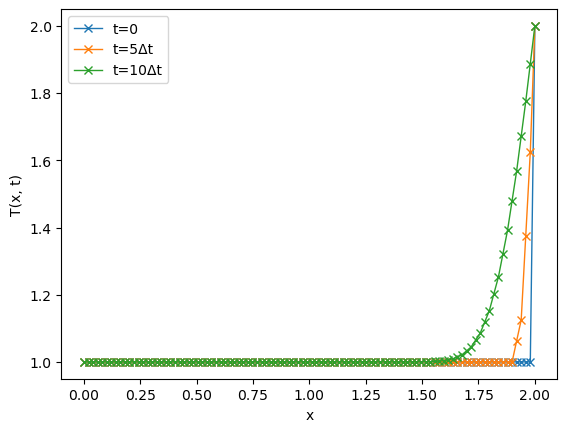

In [2]:
"""
Solución  de la conducción inestacionaria con diferencias finitas
"""
import numpy as np
import matplotlib.pyplot as plt
α=1; #difusividad térmica
L=2; 
nx=100 # numero de nodos en x
ndt=50 #numero de pasos de tiempo
Δx=L/(nx-1)
#Δt=0.1
Δt=1/2*Δx**2/α


T_sol=np.zeros((ndt,nx))

"""condiciones de contorno"""
T_0=1; T_L=2
T_sol[:,0]=T_0;
T_sol[:,nx-1]=T_L;

T_in=np.ones(nx-2) #condición inicial
T_sol[0,1:nx-1]=T_in

x_df=np.linspace(0, L, nx)
for j in range(0, ndt-1):
    for i in range(1, nx-1):
        T_sol[j+1,i]=T_sol[j,i]+ α*Δt/Δx**2*(T_sol[j,i-1]-2*T_sol[j, i]+T_sol[j,i+1])



"""
gráficos de las soluciones con pyplot
"""
plt.plot( x_df, T_sol[0, :], lw=1, marker='x')
plt.plot( x_df, T_sol[4, :], lw=1, marker='x')
plt.plot( x_df, T_sol[49, :], lw=1, marker='x')
plt.xlabel('x')
plt.ylabel('T(x, t)')
plt.gca().legend(('t=0','t=5Δt','t=10Δt'))
plt.show()

### *Backward Euler* implicit scheme


if we evaluate the spatial derivative of the R.H.S at  $t=t^{(n+1)}$  we get

$$\frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}= \alpha\pardder{\varg}{\xcoor}(t=t^{(n+1)})=\alpha\frac{\varg_{i+1}^{(n+1)}-2\varg_{i}^{(n+1)}+\varg_{i-1}^{(n+1)} }{{\Delta x}^2}$$

In this case the value of $\varg_{i}^{(n+1)}$ is related to the values of $\varg_{i-1}^{(n+1)}$ and $\varg_{i+1}^{(n+1)}$, yielding an equation with three unknowns. The computational stencil is seen below.  
![title](backward_euler.png)


Then we obtain a systen of n equations whose unknowns are $\varg_{k}^{(n+1)}$ 


$$\left[1+  \frac{\alpha \Delta t}{{\Delta x}^2}\right] 2\varg_{i}^{(n+1)}-\frac{\alpha \Delta t}{{\Delta x}^2}\varg_{i+1}^{(n+1)}-\frac{\alpha \Delta t}{{\Delta x}^2}\varg_{i-1}^{(n+1)}=\varg_{i}^{(n)} $$

In case the problem has Dirichlet boundary conditions at the boundaries the equations for node 0 and node $n$ are unnecesary, and the values of $\varg_0$  and $\varg_{n}$ appear in the R.H.S. of the equations of $\varg_1$  and $\varg_{n-1}$ 

$$ \phi_0= T_0\rightarrow \quad
 \left[1+  \frac{\alpha \Delta t}{{\Delta x}^2}\right] 2\varg_{1}^{(n+1)}-\frac{\alpha \Delta t}{{\Delta x}^2}\varg_{2}^{(n+1)}=\varg_{i}^{(n)}+\frac{\alpha \Delta t}{{\Delta x}^2}T_{0}^{(n+1)}
$$

We see that the system of equations creates a tridiagonal matrix whose elements along the main diagonal are positive and greater than those on the lower and upper diagonals, which are negative. This implies an important consequence to the stability of the problem, which will be seen later


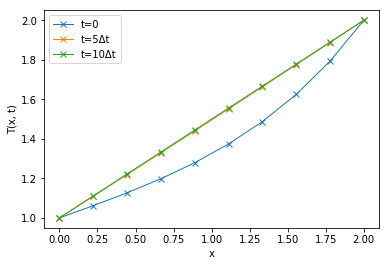

In [6]:
"""
Solución  de la conducción inestacionaria con diferencias finitas por método backward Euler
"""
import numpy as np
import matplotlib.pyplot as plt
α=1; #difusividad térmica
L=2; 
nx=10 # numero de nodos en x
ndt=10 #numero de pasos de tiempo
Δx=L/(nx-1)
Δt=1

T_sol=np.zeros((ndt+1,nx))  #cada fila representa la distr espacial de T para un instante dado

"""condiciones de contorno"""
T_0=1; T_L=2
T_sol[:,0]=T_0;
T_sol[:,nx-1]=T_L;

T_in=np.ones(nx-2) #condición inicial
T_sol[0,1:nx-1]=T_in

#print(T_sol)
""" ensamble de la matriz de coeficientes """
M=np.zeros((nx-2, nx-2))
RHS=np.zeros((nx-2, 1))

M[0,0]=1+2*α*Δt/Δx**2 ## primera fila (depende de las BC)
M[0,1]=-α*Δt/Δx**2
for i in range (1,nx-3):
    M[i,i]=1+2*α*Δt/Δx**2;
    M[i,i-1]=-α*Δt/Δx**2
    M[i,i+1]=-α*Δt/Δx**2

M[nx-3,nx-3]=1+2*α*Δt/Δx**2; #ultima fila (depende de las BCs)
M[nx-3,nx-4]=-α*Δt/Δx**2

#RHS=T_sol[0,1:nx-1]

x_df=np.linspace(0, L, nx)
for j in range(0, ndt):
    RHS[:,0]=T_sol[j,1:nx-1] #armo vector de términos indeptes (sumo phi_i, n)
    RHS[0,0]= RHS[0]+α*Δt/Δx**2*T_sol[j,0] #BC izq
    RHS[nx-3,0]= RHS[nx-3]+α*Δt/Δx**2*T_sol[j,nx-1] #BC der
    #print("RHS=",RHS)
    T_u=np.linalg.solve(M, RHS).transpose()
    T_sol[j+1,1:nx-1]=T_u


"""
gráficos de las soluciones con pyplot
"""
plt.plot( x_df, T_sol[1, :], lw=1, marker='x')
plt.plot( x_df, T_sol[4, :], lw=1, marker='x')
plt.plot( x_df, T_sol[9, :], lw=1, marker='x')
plt.xlabel('x')
plt.ylabel('T(x, t)')
plt.gca().legend(('t=0','t=5Δt','t=10Δt'))
plt.show()

## Properties of numerical schemes

### Convergence


A numerical scheme converges (or is convergent) if the discrete solution tends to the exact (analytical) solution when the spatial and temporal discretization steps approach zero 

$$lim_{\Delta x\rightarrow 0}(lim_{\Delta t\rightarrow 0} \phi_i^{(n)} )= \phi(x_i, t^ {(n)})$$ 

**The evaluation of the convergence from its definition is very difficult (or sometimes impossible) to prove because of roundoff errors present in computing and because many times a problem doesn't have an analytical solution **

### Consistencia

A numerical scheme is said to be *consistent*  with the differential equation it approximates if when the limit of the spatial and temporal steps  towards zero is taken to the discrete equation then it reproduces the analytical continous differential equation at every point of the grid 

Being $\mathcal{L}(x,t)$ an analytical  (continous) differential operator and $ L(x_i,t^{(n)})$  its discrete counterpart, it must fulfill

$$ \lim_{\Delta x\rightarrow 0}\lim_{\Delta t \rightarrow 0} L(x_i, t^{(n)})= \mathcal{L}(x,t) $$


#### Ejemplo: esquema forward Euler para la ec del calor inestacionaria

$$L(x_i, t^{(n)})=\frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}-\alpha\frac{\varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+\varg_{i-1}^{(n)} }{{\Delta x}^2}$$


$$ \lim_{\Delta x\rightarrow 0}\lim_{\Delta t \rightarrow 0} L(x_i, t^{(n)})= \lim_{\Delta x\rightarrow 0}\lim_{\Delta t \rightarrow 0} \left[\frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}-\alpha\frac{\varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+\varg_{i-1}^{(n)} }{{\Delta x}^2} \right]$$

siendo que, por definición
$$ \lim_{\Delta t \rightarrow 0} \frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}=\parder{\phi}{t}$$
 y por otro lado
 $$\begin{aligned}
 \lim_{\Delta x\rightarrow 0}\lim_{\Delta t \rightarrow 0}
 \alpha\frac{\varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+\varg_{i-1}^{(n)} }{{\Delta x}^2}&=lim_{\Delta x\rightarrow 0}\lim_{\Delta t \rightarrow 0} \frac{1}{\Delta x}\frac{(\varg_{i+1}^{(n)}-\varg_{i}^{(n)})-(\varg_{i}^{(n)}-\varg_{i-1}^{(n)}) }{{\Delta x}}\\
 &= lim_{\Delta t\rightarrow 0}\lim_{\Delta x \rightarrow 0}\frac{1}{\Delta x}\left[ \lim_{\Delta x \rightarrow 0}\frac{(\varg_{i+1}^{(n)}-\varg_{i}^{(n)})}{\Delta x}-\lim_{\Delta x \rightarrow 0}\frac{(\varg_{i}^{(n)}-\varg_{i-1}^{(n)}) }{\Delta x}\right]\\
 &= lim_{\Delta t\rightarrow 0}\lim_{\Delta x \rightarrow 0}\frac{1}{\Delta x}\left[ \parder{\phi}{x}_{x_i}-\parder{\phi}{x}_{x_{i-1}}\right]\\
  &= lim_{\Delta t\rightarrow 0}\lim_{\Delta x \rightarrow 0}\frac{\left[ \parder{\phi}{x}_{x_i}-\parder{\phi}{x}_{x_{i-1}}\right]}{\Delta x}\\
  &=\pardder{\phi}{x}
 \end{aligned}$$
 
 ### Estabilidad
 
 Es la propiedad de un esquema de que, si existe una perturbación $\epsilon$ en la evaluación del mismo, el error producido por ésta se mantiene acotado en el tiempo y en el espacio.
 
$$\tilde{\varg}(x_i)={\varg}(x_i)+  \epsilon(x_i)$$

Siendo $\tilde{\varg}(x_i)$ la *aproximación computacional* de la solución numérica.El origen del error puede deberse al error de redondeo en operaciones, aproximación inexacta de funciones transcendentales o números irracionales, etc. 

Si el esquema numérico es lineal, entonces el error reproduce la misma ecuación

#### Ejemplo:

$$ \begin{aligned} \frac{\tilde\varg_{i}^{(n+1)}-\tilde\varg_{i}^{(n)}}{\Delta t}&=\alpha\frac{\tilde\varg_{i+1}^{(n)}-2\tilde\varg_{i}^{(n)}+\tilde\varg_{i-1}^{(n)} }{{\Delta x}^2} \\ 
\frac{\varg_{i}^{(n+1)}+ \epsilon(x_i, t^{(n+1)})-\varg_{i}^{(n)}- \epsilon(x_i, t^{(n)})}{\Delta t}&=\alpha\frac{\varg_{i+1}^{(n)}  +\epsilon(x_{i+1}, t^{(n)})-2\varg_{i}^{(n)}-2\epsilon(x_{i+1}, t^{(n)})+\varg_{i-1}^{(n)}+\epsilon(x_{i+1}, t^{(n)}) }{{\Delta x}^2} \\
\frac{ \epsilon(x_i, t^{(n+1)})- \epsilon(x_i, t^{(n)})}{\Delta t}&=\alpha\frac{  \epsilon(x_{i+1}, t^{(n)})-2\epsilon(x_{i+1}, t^{(n)})+\epsilon(x_{i+1}, t^{(n)}) }{{\Delta x}^2} 
\end{aligned}
$$

### Análisis de Estabilidad de Von Neumann

Se propone que el error en cada punto puede expresarse mediante una serie de Fourier
$$
\begin{equation}
 \epsilon_i^n = \sum_{m=1}^{M-2} a^n_m \exp \left(\ii \theta_m i  \right), \qquad i = 2,3,\dots,M-1,
\end{equation}$$
siendo $\ii = \sqrt{-1}$ la unidad imaginaria, $a^n_m$ la amplitud del modo $m$ en el instante $t^n$ y $\theta_m = m \pi \Delta x/L$ el número de onda $m$.

Si $\epsilon_i^{(n+1)}<\epsilon_i^{(n)}$ para cualquier i, entonces el esquema numérico es estable

### Teorema de Equivalencia de Lax


*Dado un  problema de valores   iniciales **lineal**  bien condicionado y una aproximación en diferencias finitas que satisface la condición  de consistencia, **la estabilidad es la  condición  necesaria  y  suficiente   para  que  se satisfaga   la  convergencia**.*  

Si el problema es no lineal, el teorema no está demostrado para el caso gral, pero se sabe que la consistencia y la estabilidad son **condiciones necesarias** para la convergencia 
 